In [20]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data.csv"  #file name 
#csvfile = "Data_actor2000.pt.csv"  #file name 

In [21]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance
0,0,53.75,0.63,0.16,-126.07,52.63
1,1,53.30,0.71,0.19,-150.65,60.06
2,2,55.88,0.64,0.27,-127.03,52.73
3,3,50.47,0.69,0.15,-167.82,61.52
4,4,35.52,0.78,0.21,-361.89,85.04


In [53]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [22]:
failed = data_test[data_test['Stop_Distance'] <= 5]
passed = data_test[data_test['Stop_Distance'] > 5]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

#failed.to_csv("crashed.csv",index=False)
#failed.head()

Size of crashes : 1397
Size of success : 4603
Percentage of crash cases:23.28 %
Percentage of not crashed cases:76.72 %


In [23]:
#passed.to_csv("not_crashed.csv",index=False  )
#passed.head()

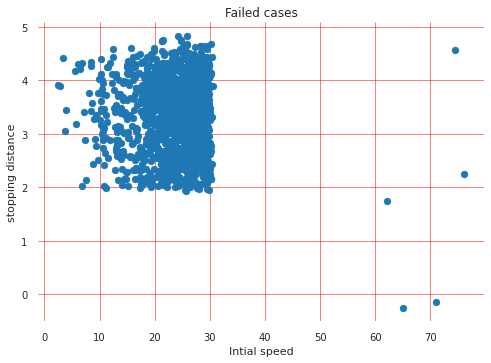

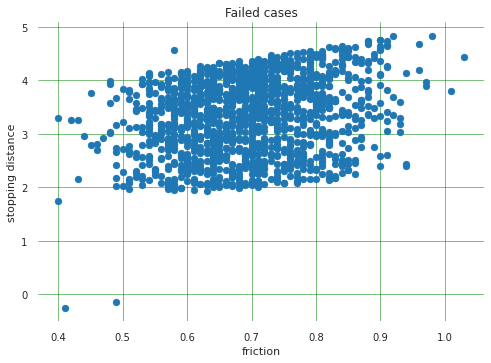

In [25]:
fig=plt.figure
plt.scatter(failed["Kick_Speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("stopping distance")
plt.show()

fig=plt.figure
plt.scatter(failed["friction"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("friction")
plt.ylabel("stopping distance")
plt.show()


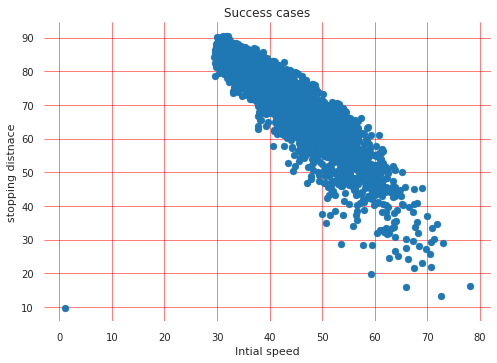

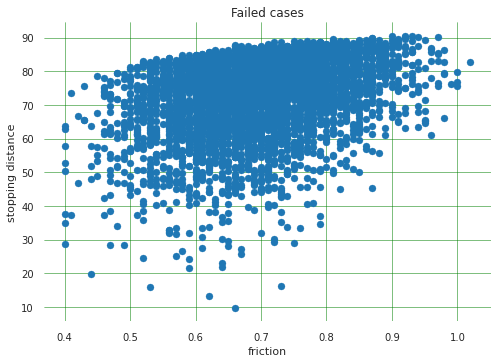

In [26]:
fig=plt.figure
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("stopping distnace")
plt.show()

fig=plt.figure
plt.scatter(passed["friction"],passed["Stop_Distance"],label='Line 2')
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("friction")
plt.ylabel("stopping distance")
plt.show()

In [27]:
data_test.loc[data_test['Stop_Distance'] <= 5, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 5, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance,test
0,0,53.75,0.63,0.16,-126.07,52.63,0.0
1,1,53.30,0.71,0.19,-150.65,60.06,0.0
2,2,55.88,0.64,0.27,-127.03,52.73,0.0
3,3,50.47,0.69,0.15,-167.82,61.52,0.0
4,4,35.52,0.78,0.21,-361.89,85.04,0.0


Total number of episodes: 6000
Number of Pass: 4602
Number of fail: 1397


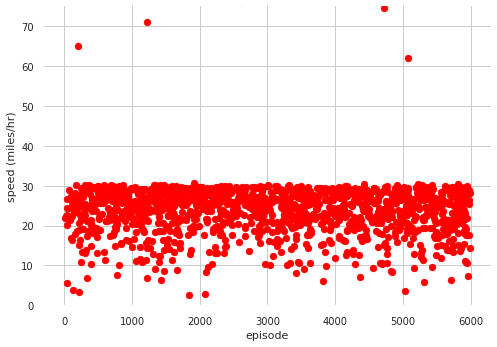

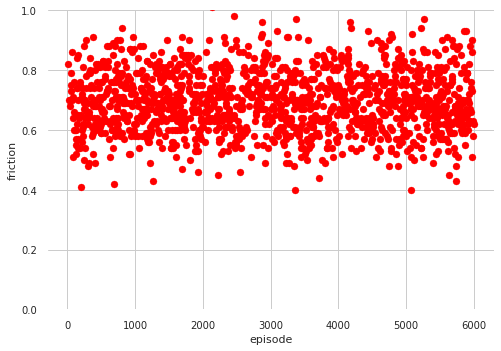

In [28]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=1
end=6000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])
friction=np.array(data_test['friction'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
#ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0,75])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()


fig, ax = plt.subplots()
ax.scatter(episode[~indices], friction[~indices], c = 'red',label='fail')
# bad values
#ax.scatter(episode[indices], friction[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0,1])
plt.xlabel('episode')
plt.ylabel('friction')
ax.grid(True) 
plt.show()

Failures:  [25, 10, 10, 5, 6, 5, 7, 19, 3, 7, 4, 17, 45, 8, 0, 12, 5, 4, 54, 5, 114, 114, 58, 32, 48, 28, 65, 49, 69, 32]


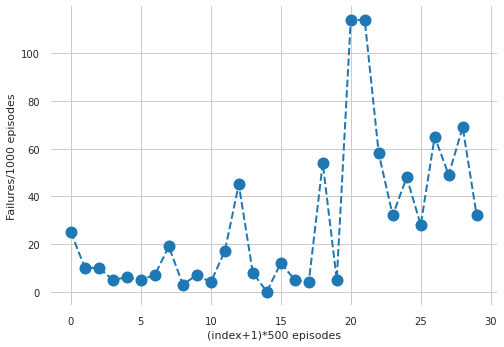

In [17]:
step=200
failure=[]
fig, ax = plt.subplots()
for i in range(int(data_test['Episode'].shape[0]/step)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*500 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   

In [11]:
#data for AVF training:
iteration_start=6000
iteration_end=9000
data=data_test[["Episode", "Kick_Speed","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed"]].values,axis=0)
np.savez('stdmean.npz',std=std, mean=mean)
data[["Episode", "Kick_Speed"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

std is: [nan nan]
Mean is: [nan nan]


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


,Episode,Kick_Speed,test


In [27]:
#AVF Training 


X=data[["Episode","Kick_Speed"]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(2,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;


(3000, 2)
(3000,)
(2,)
Epoch 1/500
252/252 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9438
Epoch 2/500
252/252 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9726
Epoch 3/500
252/252 [==============================] - 1s 2ms/step - loss: 0.0590 - accuracy: 0.9746
Epoch 4/500
252/252 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9851
Epoch 5/500
252/252 [==============================] - 1s 2ms/step - loss: 0.0394 - accuracy: 0.9886
Epoch 6/500
252/252 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 7/500
252/252 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9876
Epoch 8/500
252/252 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9900
Epoch 9/500
252/252 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9896
Epoch 10/500
252/252 [==============================] - 0s 2ms/step 

In [28]:
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)

62/62 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9939
test loss, test acc: [0.022645488381385803, 0.9939393997192383]


In [29]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [30]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [31]:
new_model = tf.keras.models.load_model('saved_model/my_model')